In [1]:
# Space Missions Dataset Analysis

# -----------------------------
# 1. IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# -----------------------------
# 2. LOAD DATA
# -----------------------------
df = pd.read_csv(r"C:\Users\ADITYA\Downloads\Space Mission Analysis-\Beginner - Space Mission Analysis-20250819T063943Z-1-001\Beginner - Space Mission Analysis\space_mission_data.csv")

# Preview dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [2]:
pd.set_option("display.max_columns", None)
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [3]:
print(df.isnull().sum())

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [5]:
# -----------------------------
# 3. DATA PREPROCESSING 
# -----------------------------

# Drop unnecessary index-like columns if present
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors="ignore")

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows where Date is missing (cannot assign Year/Month reliably)
df = df.dropna(subset=["Date"])

# Extract Year and Month from cleaned Date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Clean 'Price' column (remove $ and commas, convert to numeric)
if "Price" in df.columns:
    df["Price"] = (
        df["Price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

    # Impute missing Price values:
    # 1. Fill with organisation-wise median
    medians = df.groupby('Organisation')['Price'].transform('median')
    df['Price'] = df['Price'].fillna(medians)

    # 2. If still missing, fill with global median
    df["Price"] = df["Price"].fillna(df["Price"].median())

# Handle categorical missing values
for col in ["Rocket_Status", "Mission_Status", "Organisation", "Location"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Drop duplicates
df = df.drop_duplicates()

# Summary after cleaning
print("Data after preprocessing:\n")
df.info()

Data after preprocessing:

<class 'pandas.core.frame.DataFrame'>
Index: 4197 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4197 non-null   object             
 1   Location        4197 non-null   object             
 2   Date            4197 non-null   datetime64[ns, UTC]
 3   Detail          4197 non-null   object             
 4   Rocket_Status   4197 non-null   object             
 5   Price           4197 non-null   float64            
 6   Mission_Status  4197 non-null   object             
 7   Year            4197 non-null   int32              
 8   Month           4197 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), object(5)
memory usage: 295.1+ KB


In [6]:
print(df.isna().sum())

Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
Year              0
Month             0
dtype: int64


In [7]:
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,56.50,Success,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,450.00,Failure,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,450.00,Success,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,450.00,Failure,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,5000.00,Success,1957,11


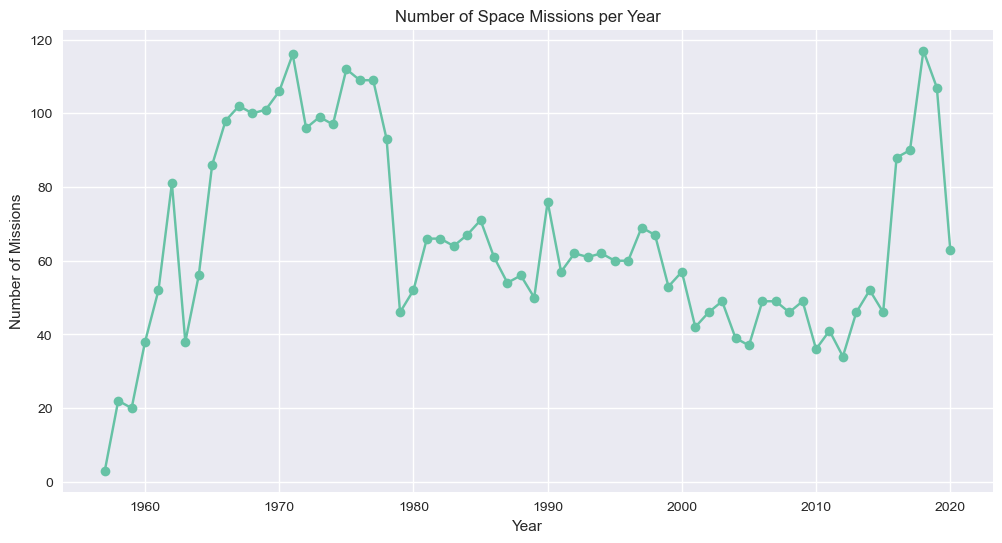

In [8]:
# -----------------------------
# 4. EXPLORATORY DATA ANALYSIS
# -----------------------------

# (A) Missions over time
missions_per_year = df["Year"].value_counts().sort_index()
plt.figure(figsize=(12,6))
missions_per_year.plot(kind="line", marker="o")
plt.title("Number of Space Missions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Missions")
plt.show()

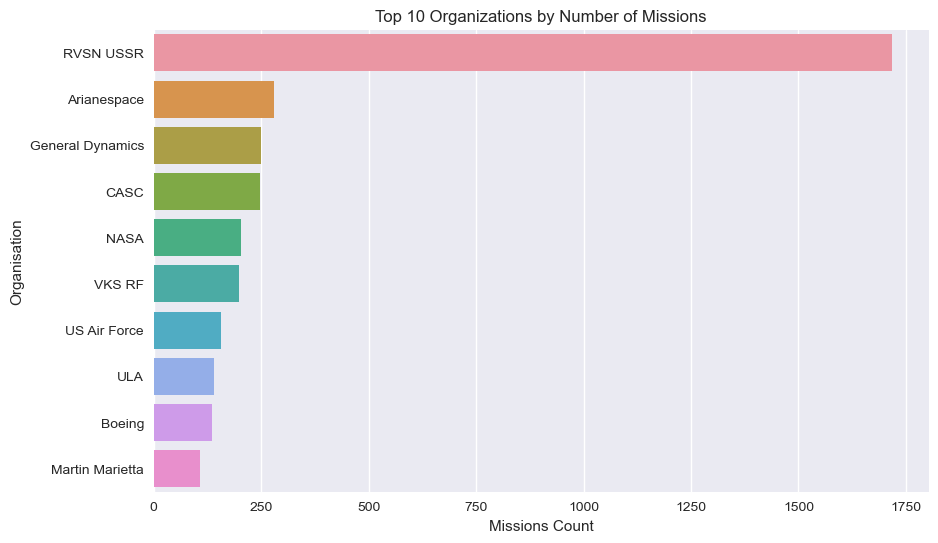

In [9]:
# (B) Top 10 Organizations by Number of Missions
top_orgs = df["Organisation"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_orgs.values, y=top_orgs.index)
plt.title("Top 10 Organizations by Number of Missions")
plt.xlabel("Missions Count")
plt.ylabel("Organisation")
plt.show()

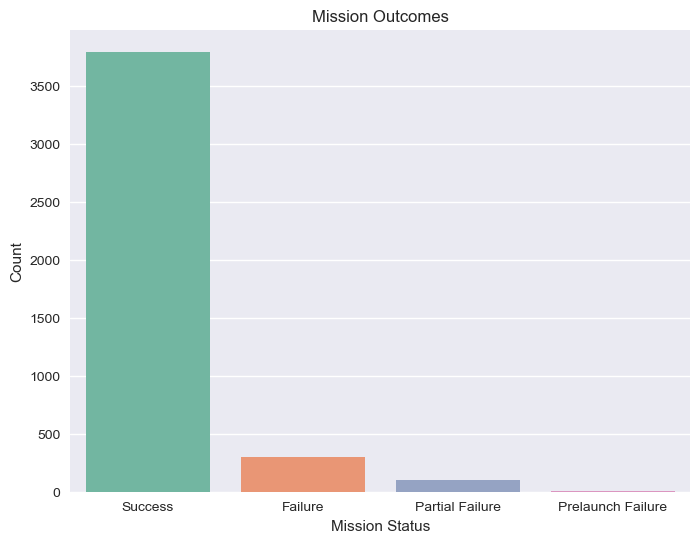

Mission_Status
Success              90.37
Failure               7.15
Partial Failure       2.43
Prelaunch Failure     0.05
Name: proportion, dtype: float64

In [10]:
# (C) Mission Success Rate
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Mission_Status", order=df["Mission_Status"].value_counts().index)
plt.title("Mission Outcomes")
plt.xlabel("Mission Status")
plt.ylabel("Count")
plt.show()

success_rate = (df["Mission_Status"].value_counts(normalize=True) * 100).round(2)
success_rate

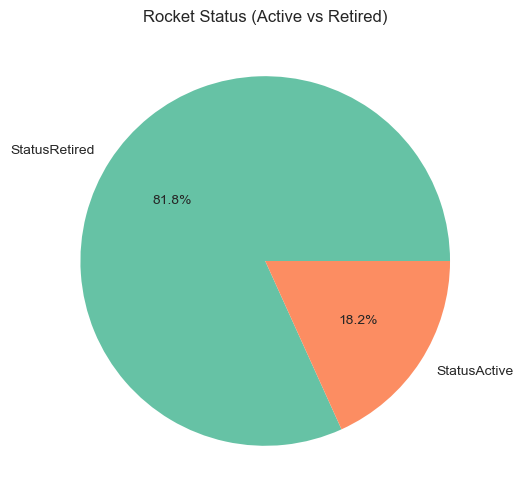

In [11]:
# (D) Rocket Status Distribution
plt.figure(figsize=(6,6))
df["Rocket_Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Rocket Status (Active vs Retired)")
plt.ylabel("")
plt.show()

In [12]:
# -----------------------------
# 5. INSIGHTS & INTERPRETATION
# -----------------------------
print("Key Insights from the Dataset:\n")

# Missions over time
print(f"- Space missions have been recorded from {df['Year'].min()} to {df['Year'].max()}.")
print(f"- The busiest year was {missions_per_year.idxmax()} with {missions_per_year.max()} missions.")

# Organisations
print("\n- The most active organisation is:", df["Organisation"].value_counts().idxmax(),
      "with", df["Organisation"].value_counts().max(), "missions.")

# Mission success rate
print("\n- Overall mission success rate is around:",
      success_rate.get("Success", np.nan), "%.")

# Rocket status
print("\n- Currently,", 
      (df['Rocket_Status'] == 'StatusActive').sum(), "active rockets vs",
      (df['Rocket_Status'] == 'StatusRetired').sum(), "retired.")

# Launch cost insights
if "Price" in df.columns and df["Price"].notna().sum() > 0:
    print("\n- Launch cost data is available for", df["Price"].notna().sum(), "missions.")
    print("- The average recorded launch cost is ~", round(df["Price"].mean(), 2), "million USD.")

Key Insights from the Dataset:

- Space missions have been recorded from 1957 to 2020.
- The busiest year was 2018 with 117 missions.

- The most active organisation is: RVSN USSR with 1717 missions.

- Overall mission success rate is around: 90.37 %.

- Currently, 765 active rockets vs 3432 retired.

- Launch cost data is available for 4197 missions.
- The average recorded launch cost is ~ 2151.36 million USD.


In [13]:
# -----------------------------
# 6. CONCLUSION
# -----------------------------
print("""
Conclusion:
-----------
This dataset highlights the evolution of space missions worldwide. 
The analysis shows a steady increase in space activities with some major peaks in recent years. 
A few organisations dominate the sector (SpaceX, NASA, Roscosmos, CASC). 
Success rates are high (~90%), showing maturity of technology. 
Cost data, though sparse, indicates significant financial investment in launches.
""")


Conclusion:
-----------
This dataset highlights the evolution of space missions worldwide. 
The analysis shows a steady increase in space activities with some major peaks in recent years. 
A few organisations dominate the sector (SpaceX, NASA, Roscosmos, CASC). 
Success rates are high (~90%), showing maturity of technology. 
Cost data, though sparse, indicates significant financial investment in launches.

